In [1]:
import warnings 
warnings.filterwarnings(action='ignore')

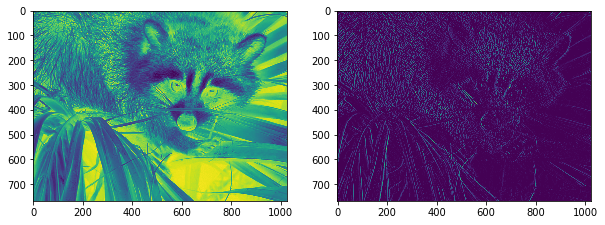

In [2]:
%matplotlib inline
from scipy import misc
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage

# 반전
img = 255 - sp.misc.face(gray=True).astype(float) # 이미지, 동영상
# edge detection filter : 경계선 검출
k = np.zeros((2,2))
# k=
# 0 0
# 0 0

k[:,0] = 1
k[:,1] = -1
# convolve 이미지에서 필터, 정보통신 무선신호 복원
img2 = np.maximum(0, sp.ndimage.filters.convolve(img,k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

C:\Users\jinxi\Anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jinxi\Anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jinxi\Anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jinxi\Anaconda3\envs\tf-env\lib\site-packages\tensorflow\pyth

(2, 427, 640, 3)


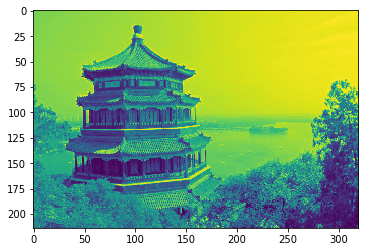

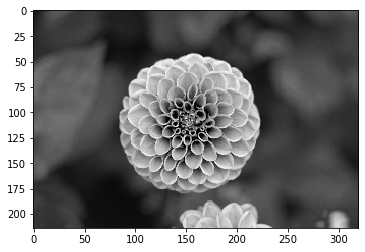

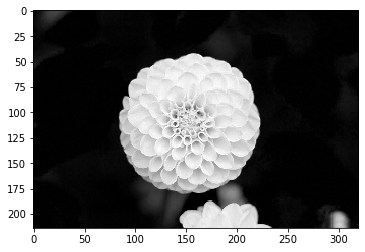

<class 'numpy.ndarray'>
(2, 214, 320, 3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype = np.float32)
# 장수, 높이, 넓이, 컬러수(RGB)
batch_size, height, width, channels = dataset.shape
print(dataset.shape)
filters= np.zeros(shape=(7,7,channels,2), dtype=np.float32)
# filters =      
# 0 0 0 0 0 0 0   2개가 만들어짐
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0

filters[:,3,:,0] = 1
filters[3,:,:,1] = 1
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

# placeholder로 이미지 포멧이 결정되어있음
convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1],
                          padding = "SAME")

# ksize와 strides가 일치해야 사이즈가 줄어듬
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1],    #2x2를 하나로 줄여줌
                         strides=[1,2,2,1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()
plt.imshow(output[1,:,:,1], cmap='gray')
plt.show()
plt.imshow(output[1,:,:,0], cmap="gray")
plt.show()
print(type(output))
print(output.shape)
# 필터가 2개이므로 2x427x640x2

(2, 213, 320, 3)
(213, 320, 3)


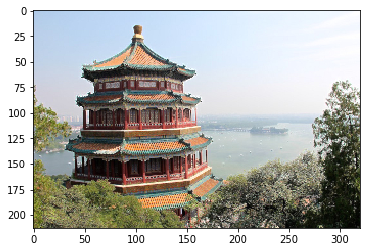

In [4]:
# max pooling된 결과를 이미지 출력
# ==> 출력안됨
# conv2d : 채널1개로 생성
# pooling : 채널을 그대로 남김 ==> 컬러출력
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1],    
                         strides=[1,2,2,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})
    print(output.shape)
print(output[0].shape)
plt.imshow(output[0].astype(np.uint8))  # usigned int형(양수)
plt.show()


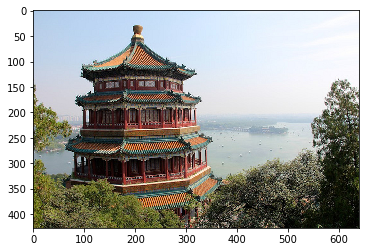

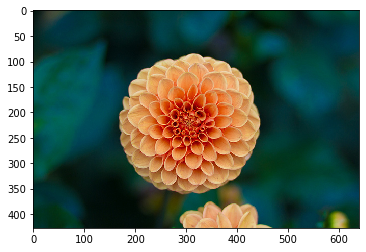

In [5]:
plt.imshow(china)
plt.show()
plt.imshow(flower)

In [6]:
def plot_image(image) :
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')

def plot_color_image(image) :
    plt.imshow(image.astype(np.uint8), interpolation='nearest')
    plt.axis('off')

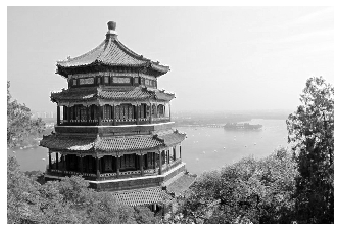

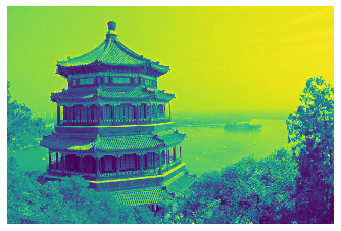

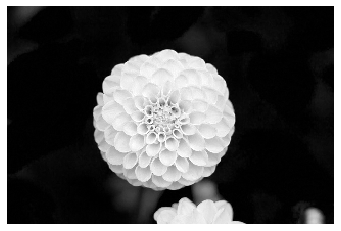

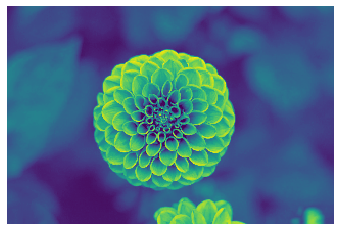

In [7]:
plot_image(output[0,:,:,1])
plt.show()
plot_color_image(output[0,:,:,1])
plt.show()
plot_image(output[1,:,:,0])
plt.show()
plot_color_image(output[1,:,:,1])

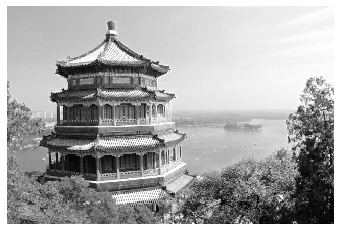

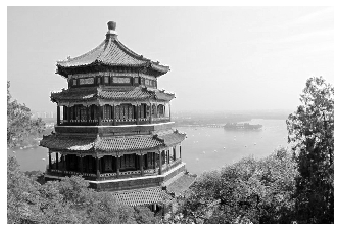

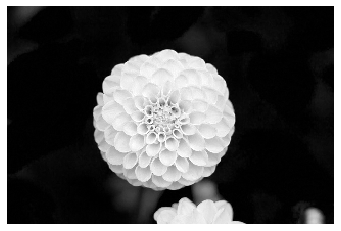

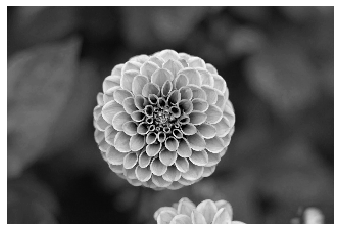

In [8]:
for image_index in (0,1) :
    for feature_map_index in (0,1) :
        plot_image(output[image_index,:,:,feature_map_index])
        plt.show()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


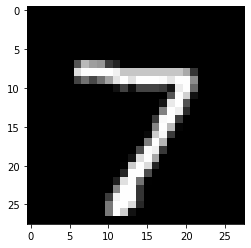

In [9]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
first_image = mnist.test.images[0] # 784(한줄로 되어있음)
pixels = first_image.reshape((28,28))
plt.imshow(pixels, cmap = 'gray')
plt.show()

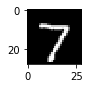

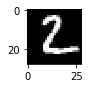

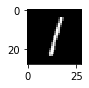

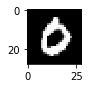

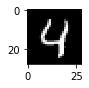

In [10]:
# 여러 이미지 사용하기
image = mnist.test.images[0:5] # 784, 784, 784, ..
images = np.array(image,dtype='float')
for i in range(5) :
    pixels = images[i].reshape((28,28))
    plt.figure(figsize=(1,1))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    

In [11]:
learning_rate = 0.001   #optimizer에서 사용
num_steps = 500    # epoch 반복
batch_size = 128   # mini batch size
display_step = 10  # 시각화

num_input = 784    # 이미지 28x28 => fully-connected됨(한줄)
num_classes = 10   # one-hot-encoding
dropout = 0.75     # 과정합 방지를 위해 임의적으로 25%는 계산 안함
                      # random으로 진행
                      # hyper parameter로 가능
    
X = tf.placeholder(tf.float32, [None,num_input], name = 'input')    # 훈련데이터  # 128 x 784
Y = tf.placeholder(tf.float32, [None, num_classes], name='output') # 종속변수    # 128 x 10
keep_prob = tf.placeholder(tf.float32, name = 'keep')  # dropout을 받기 위함

In [12]:
# 1번 이상 반복되면 함수화 필요
# activation function : 
# - 마지막에 한번만 호출( 선형-> 비선형 / 회귀,분류 결정)
# - Muli layer에서 XOR 문제를 해결하기 위해 activation 함수를 이용하여 비선형으로 문제 풀어야함
# - CNN은 deep할 수록 결과가 좋다.

def conv2d(x, W, b, strides=1) :
    # 가중치 : filter
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1], padding = 'SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)  # 비선형으로 mapping됨

def maxpool2d(x, k=2) :
    return tf.nn.max_pool(x, ksize=[1,k,k,1],
                         strides = [1,k,k,1],
                         padding = 'SAME')

In [13]:
def conv_net(x, weights, biases, dropout) :   # 128x784 => 28x28
    x = tf.reshape(x, shape=[-1,28,28,1])     # 원래 이미지 형태 # conv2d가 컬러값까지 4개를 요구하므로 1을 넣어서 차수 맞춤
    # 128x28x28x1                             
    # 보통 이미지는 사각형이므로(일자가 아님) 위 코드는 안써도됨
    
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])  # 128 x 28 x 28 x 32
    conv1 = maxpool2d(conv1,k=2)  # 128 x 14 x 14 x 32(특징은 그대로)
    
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])  # 128 x 14 x 14 x 64
    conv2 = maxpool2d(conv2,k=2)   # 128 x 7 x 7 x 64
    
    # fully-connected 됨
    fc1 = tf.reshape(conv2, [-1,weights['wd1'].get_shape().as_list()[0]]) # get_shape : 7*7*64, 1024  [0] : 7*7*64
    #                 128x7x7x64, 7x7x64x1024 => 128x1024
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)  # 25% 계산을 버림 # hyper parameter로 가능
    
    #                   128x1024,  1024x10 => 128x10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [15]:
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits, name = 'prediction')
loss_op = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name = 'accuracy')

tf.add_to_collection('accuracy', accuracy)
tf.add_to_collection('prediction', prediction)
tf.add_to_collection('Xi',X)
tf.add_to_collection('Yi',Y)
init = tf.global_variables_initializer()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
'''with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step ==0 or step == 1:
            loss , acc = sess.run([loss_op, accuracy],
                                 feed_dict = {X: batch_x, Y: batch_y, keep_prob : 1.0})
            print("Step " + str(step) + ", Minibatch Loss =  " + '{:.4f}'.format(loss)+
                 ",Training Accuracy =  " + "{:.3f}".format(acc))
    
    print("Testing Accuracy: ",
         sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256],
                                      keep_prob: 1.0}))
'''

'with tf.Session() as sess:\n    sess.run(init)\n    for step in range(1,num_steps+1):\n        batch_x, batch_y = mnist.train.next_batch(batch_size)\n        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})\n        if step % display_step ==0 or step == 1:\n            loss , acc = sess.run([loss_op, accuracy],\n                                 feed_dict = {X: batch_x, Y: batch_y, keep_prob : 1.0})\n            print("Step " + str(step) + ", Minibatch Loss =  " + \'{:.4f}\'.format(loss)+\n                 ",Training Accuracy =  " + "{:.3f}".format(acc))\n    \n    print("Testing Accuracy: ",\n         sess.run(accuracy, feed_dict={X:mnist.test.images[:256], Y:mnist.test.labels[:256],\n                                      keep_prob: 1.0}))\n'

In [17]:
# 문제 : 테스트 데이터 100번부터 20개의 데이터를 예측해보세요.
# 예측된 데이터를 출력
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1) :
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step ==0 or step == 1:
            loss , acc = sess.run([loss_op, accuracy],
                                 feed_dict = {X: batch_x, Y: batch_y, keep_prob : 1.0})
            print("Step " + str(step) + ", Minibatch Loss =  " + '{:.4f}'.format(loss)+
                 ",Training Accuracy =  " + "{:.3f}".format(acc))
    
    save_path = saver.save(sess, 'data/cnn_model.ckpt') 
    # 모델을 저장함( with문이 끝나면 사라지기 때문)
    # 모델이 끝나고 저장
                                                           
    print("Testing Accuracy: ",
    sess.run(accuracy, feed_dict={X:mnist.test.images[100:120], Y:mnist.test.labels[100:120],
                                  keep_prob: 1.0}))
    print(sess.run(tf.argmax(prediction,1),
                   feed_dict={X:mnist.test.images[100:120], Y:mnist.test.labels[100:120],
                              keep_prob: 1.0}))

Step 1, Minibatch Loss =  32704.3809,Training Accuracy =  0.133
Step 10, Minibatch Loss =  12606.7773,Training Accuracy =  0.453
Step 20, Minibatch Loss =  4951.4844,Training Accuracy =  0.711
Step 30, Minibatch Loss =  6077.0264,Training Accuracy =  0.672
Step 40, Minibatch Loss =  4514.8428,Training Accuracy =  0.820
Step 50, Minibatch Loss =  3793.8127,Training Accuracy =  0.820
Step 60, Minibatch Loss =  1673.7385,Training Accuracy =  0.891
Step 70, Minibatch Loss =  2028.6375,Training Accuracy =  0.867
Step 80, Minibatch Loss =  1473.7709,Training Accuracy =  0.914
Step 90, Minibatch Loss =  3359.3599,Training Accuracy =  0.852
Step 100, Minibatch Loss =  1784.2515,Training Accuracy =  0.898
Step 110, Minibatch Loss =  1656.3800,Training Accuracy =  0.914
Step 120, Minibatch Loss =  982.3120,Training Accuracy =  0.875
Step 130, Minibatch Loss =  1818.2483,Training Accuracy =  0.898
Step 140, Minibatch Loss =  1464.1077,Training Accuracy =  0.891
Step 150, Minibatch Loss =  1411.71

In [21]:
mnist.test.images[:256].shape

(256, 784)

In [22]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph("data/cnn_model.ckpt.meta")
new_saver.restore(sess, "data/cnn_model.ckpt")
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0")
Yi = sess.graph.get_tensor_by_name("output:0")

keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
prediction = sess.graph.get_tensor_by_name('prediction:0')
result = sess.run(accuracy, feed_dict={Xi: mnist.test.images[:256],
                                       Yi: mnist.test.labels[:256],
                                       keep:1.0})
print(result)

INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt
0.9609375


In [24]:
# 문제 : 저장된 모델을 로딩한 다음
# 테스트 데이터 100번부터 20개의 데이터를 예측하여 출력하고 정확도를 출력하시오
print(sess.run(accuracy, feed_dict={Xi: mnist.test.images[100:120],
                                       Yi: mnist.test.labels[100:120],
                                       keep:1.0}))

sess.run(tf.argmax(prediction,1), feed_dict={Xi: mnist.test.images[100:120],
                                       Yi: mnist.test.labels[100:120],
                                       keep:1.0})

1.0


array([6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2],
      dtype=int64)